# SVD

### Trabajando sobre una imagen en blanco y negro

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from skimage.io import imread
from numpy.linalg import svd
from matplotlib.pyplot import imshow

from PIL import Image

En este notebook exploramos como podemos utilizar la SVD para realizar la **compression de una imagen** y ir viendo que a medida que realizamos la reduccion de dimensiones vamos **perdiendo informacion** y como esto afecta a la misma.

In [2]:
img = imread('fiuba.jpg')
img.shape

(188, 336, 3)

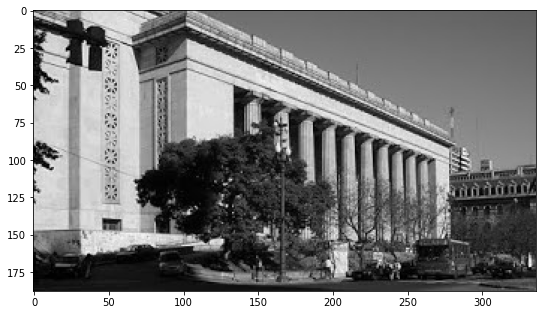

In [3]:
# obtenemos la imagen para poder trabajarla
# 336 x 188
img = Image.open('fiuba.jpg')
imggray = img.convert('LA')
x,y = (188,336)
plt.figure(figsize=(9, 6))
plt.imshow(imggray);

In [4]:
# llevamos la imagen a una representacion matricial con numpy 
# para poder operar
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)

In [5]:
imgmat

matrix([[ 68.,   6., 104., ...,  95.,  95.,  95.],
        [182., 147.,  93., ...,  96.,  95.,  95.],
        [212., 212., 217., ...,  96.,  96.,  96.],
        ...,
        [ 15.,  15.,  15., ..., 107.,  96.,  82.],
        [ 24.,  24.,  25., ...,  87.,  88., 108.],
        [ 10.,  10.,  11., ...,  69.,  71.,  92.]])

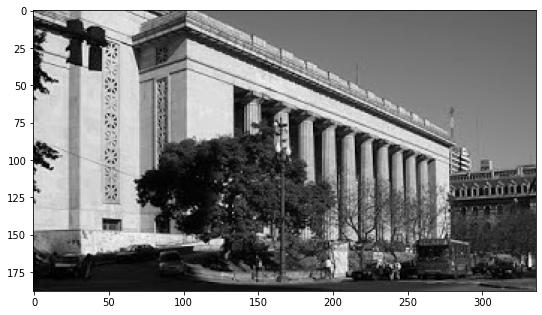

In [6]:
# realizamos el plot a partir de la matriz (no la imagen)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

In [7]:
# realizamos la descomposicion en valores singulares
u, s, v = np.linalg.svd(imgmat)

## Analisis de valores singulares

## Calculo de la energia

In [8]:
# calculo de energia
singular_values = s
energy_total = sum(singular_values**2)
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)
print(energy_percentage)

[8.36566406e+01 4.71494323e+00 1.69207573e+00 1.15192604e+00
 9.92599351e-01 8.32052917e-01 5.11349206e-01 4.62477968e-01
 4.22836837e-01 4.03967891e-01 3.47499771e-01 2.79080144e-01
 2.53692968e-01 2.15808267e-01 2.00653495e-01 1.96405515e-01
 1.77016998e-01 1.56662163e-01 1.37371735e-01 1.26910299e-01
 1.16998195e-01 1.16774374e-01 1.10054204e-01 1.04866499e-01
 9.66399196e-02 8.70312850e-02 8.50778759e-02 7.93190484e-02
 7.51919265e-02 7.01695983e-02 6.77889781e-02 6.24120177e-02
 6.05946544e-02 6.00059583e-02 5.77246283e-02 5.55612746e-02
 5.31920860e-02 5.12681184e-02 4.93876267e-02 4.79012345e-02
 4.54576672e-02 4.45527893e-02 4.38793999e-02 4.19062456e-02
 4.14533837e-02 4.02880163e-02 3.80014777e-02 3.74354544e-02
 3.65204504e-02 3.41786377e-02 3.32868178e-02 3.19154595e-02
 3.10488052e-02 3.04338678e-02 2.95886654e-02 2.87291150e-02
 2.77565516e-02 2.72697029e-02 2.55600438e-02 2.45511485e-02
 2.41858958e-02 2.34343732e-02 2.24918517e-02 2.23138193e-02
 2.11384021e-02 2.065915

In [9]:
# realizamos entonces el calculo de cuanta energia se va
# acumulando con cada uno de los valores singualres
acumulated_energy = 0
for i in range(len(energy_percentage)):
    acumulated_energy = acumulated_energy + energy_percentage[i]
    print ('Number of Singular Values ' + str(i+1) + ': ' + str(singular_values[i]) + ' ' + str(round(acumulated_energy,2)) + '%')

Number of Singular Values 1: 30120.85689858358 83.66%
Number of Singular Values 2: 7150.811772312641 88.37%
Number of Singular Values 3: 4283.778534860609 90.06%
Number of Singular Values 4: 3534.5115993416757 91.22%
Number of Singular Values 5: 3280.983950503762 92.21%
Number of Singular Values 6: 3003.9492153207384 93.04%
Number of Singular Values 7: 2354.918629033796 93.55%
Number of Singular Values 8: 2239.55966289889 94.01%
Number of Singular Values 9: 2141.428213580089 94.44%
Number of Singular Values 10: 2093.1026891313018 94.84%
Number of Singular Values 11: 1941.3076848294252 95.19%
Number of Singular Values 12: 1739.7289132323215 95.47%
Number of Singular Values 13: 1658.7133018141697 95.72%
Number of Singular Values 14: 1529.8581040280917 95.94%
Number of Singular Values 15: 1475.1645841955092 96.14%
Number of Singular Values 16: 1459.4658961421826 96.33%
Number of Singular Values 17: 1385.5576404660505 96.51%
Number of Singular Values 18: 1303.464393631371 96.67%
Number of 

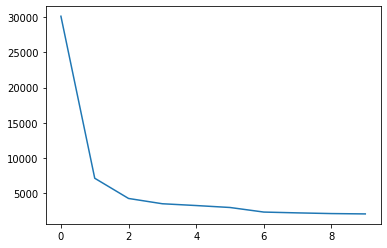

In [10]:
# realizamos un plot de los valores singulaes
# es interesante ir reduciendo el rango para poder 
# verificar algun posible 'codo' para poder considerar 
# la dimensionalidad intrinseca de los datos
plt.plot(s[:10])

## Reconstruyendo la imagen a partir de los datos reducidos

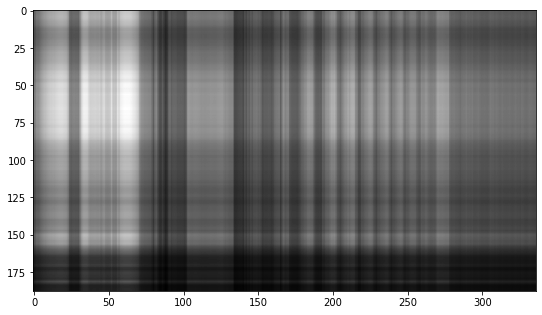

In [11]:
# Primer valor singular
reconstimg = np.matrix(u[:, :1]) * np.diag(s[:1]) * np.matrix(v[:1, :])
plt.figure(figsize=(9,6))
plt.imshow(reconstimg, cmap='gray');

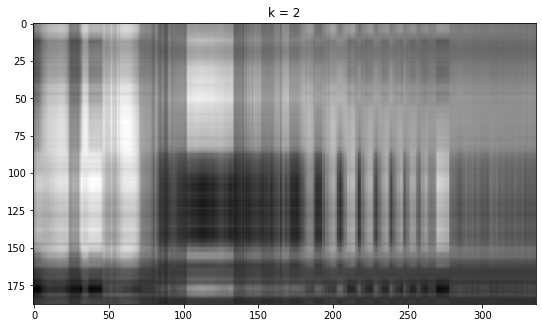

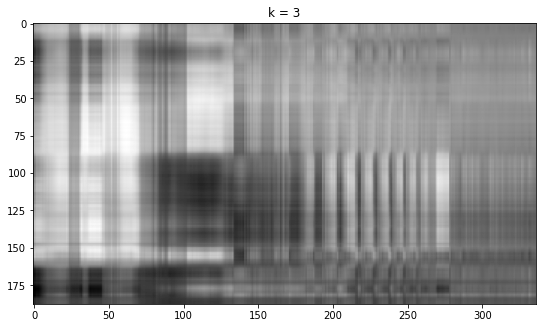

In [12]:
for i in range(2, 4):
    reconstimg = np.matrix(u[:, :i]) * np.diag(s[:i]) * np.matrix(v[:i, :])
    plt.figure(figsize=(9,6))
    plt.imshow(reconstimg, cmap='gray')
    plt.title('k = ' + str(i))  
    plt.show()

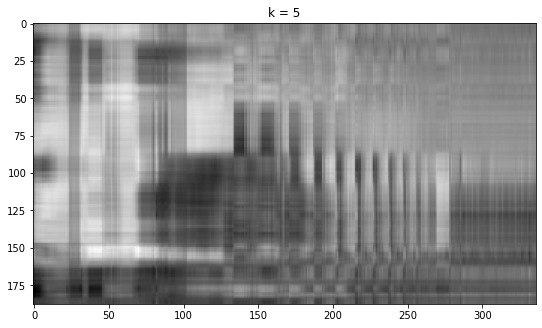

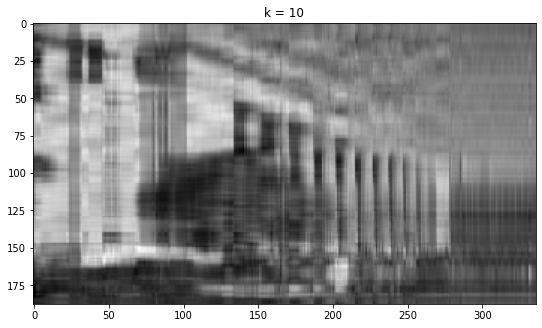

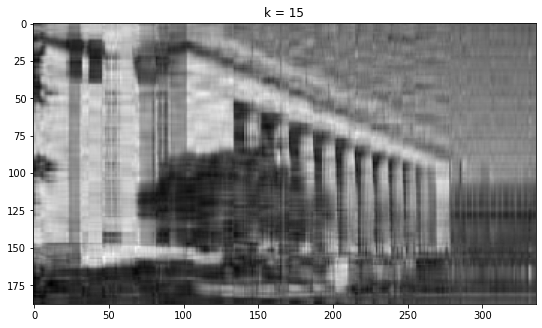

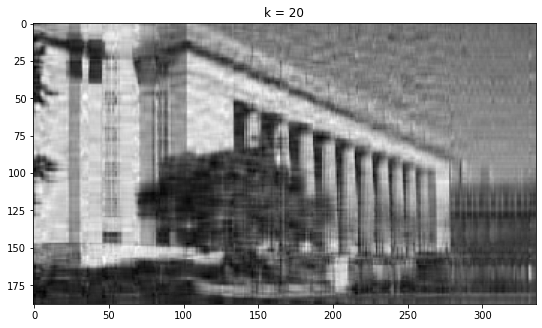

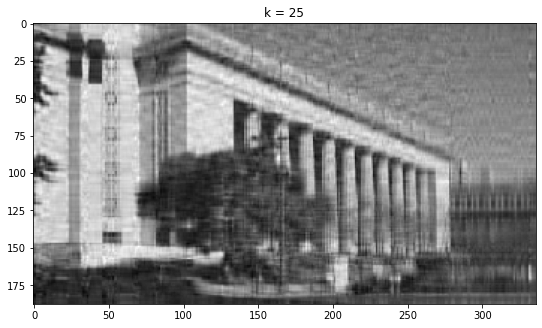

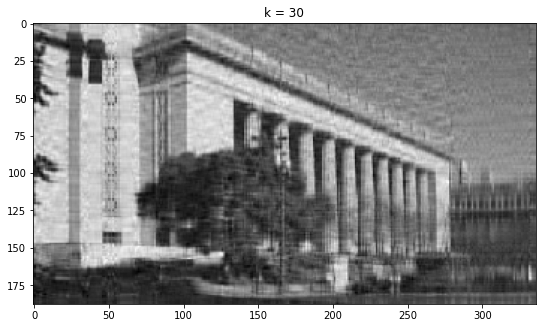

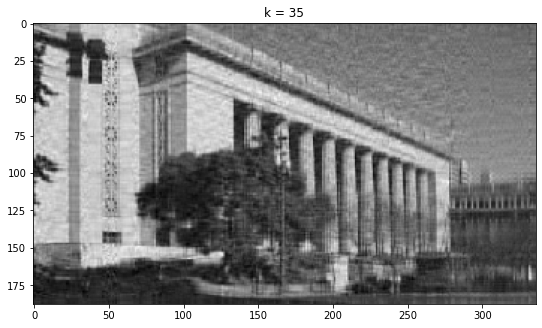

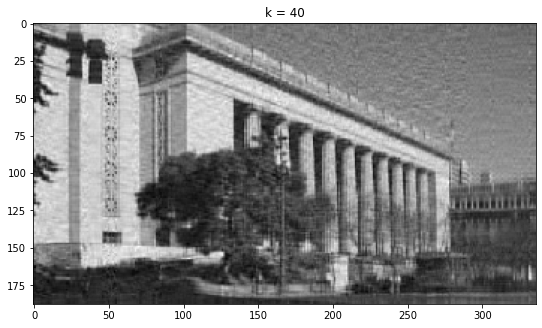

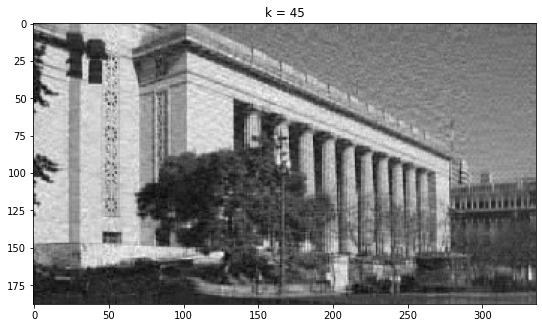

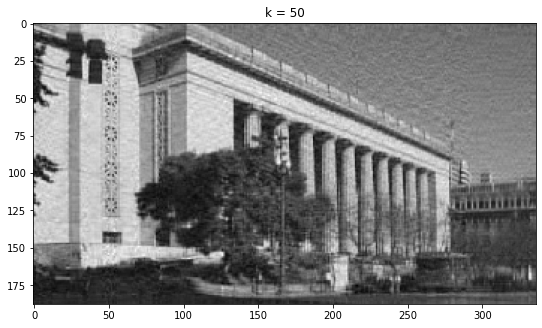

In [13]:
for i in range(5, 51, 5):
    reconstimg = np.matrix(u[:, :i]) * np.diag(s[:i]) * np.matrix(v[:i, :])
    plt.figure(figsize=(9,6))
    plt.imshow(reconstimg, cmap='gray')
    plt.title('k = ' + str(i))
    plt.show()

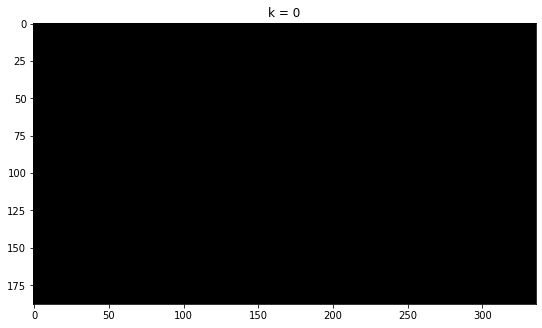

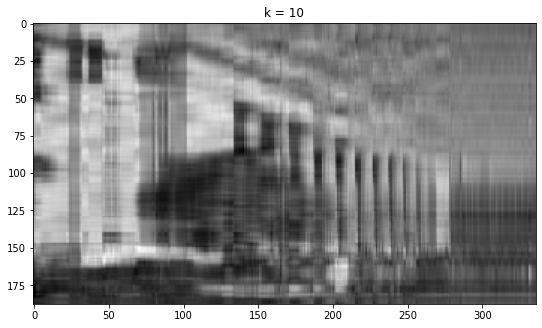

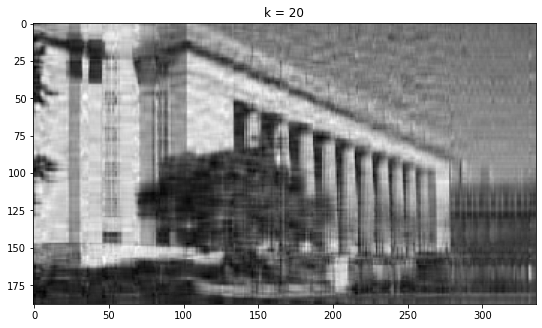

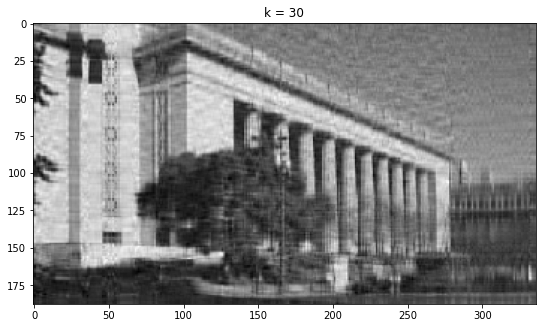

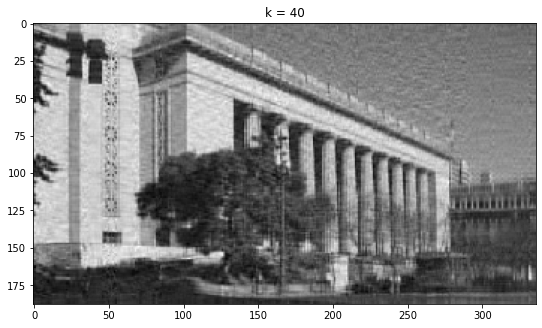

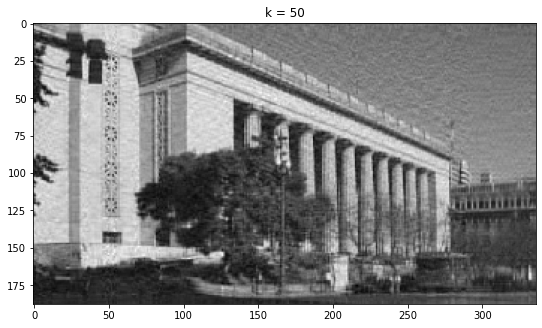

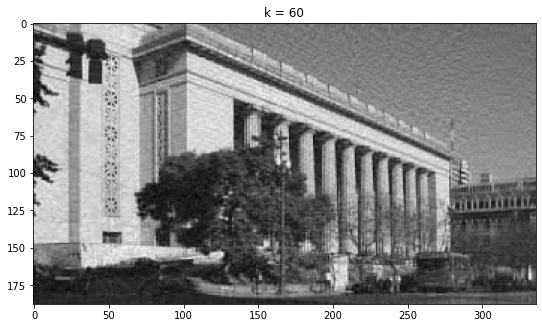

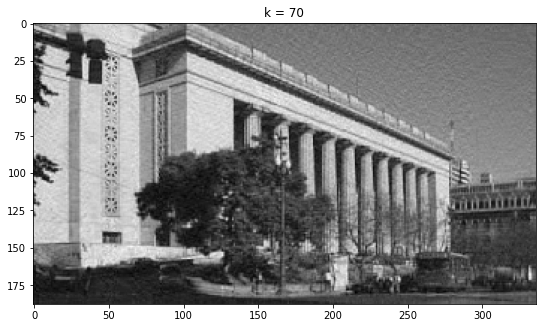

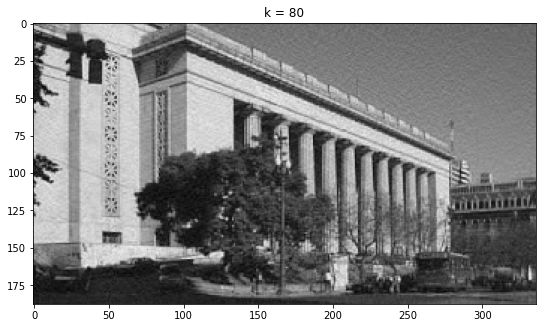

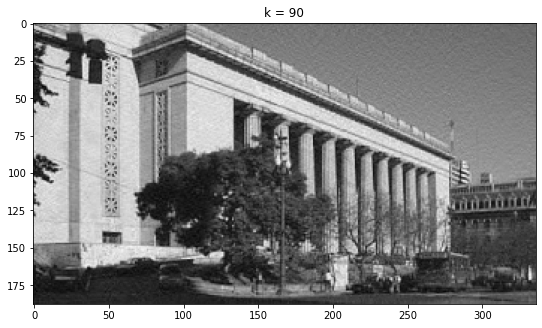

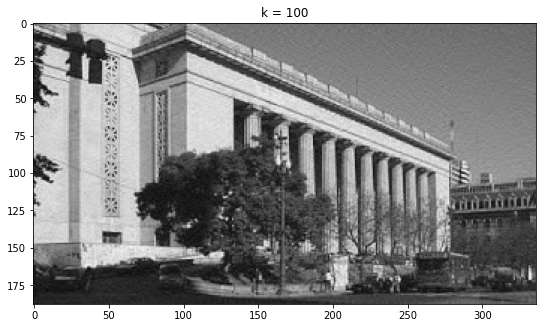

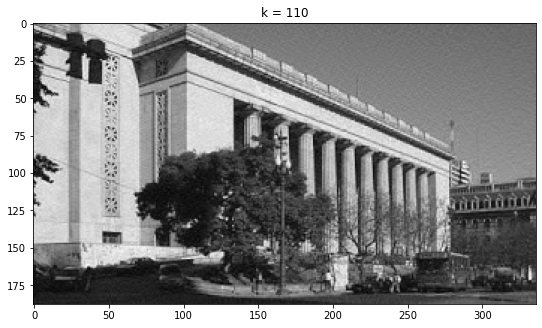

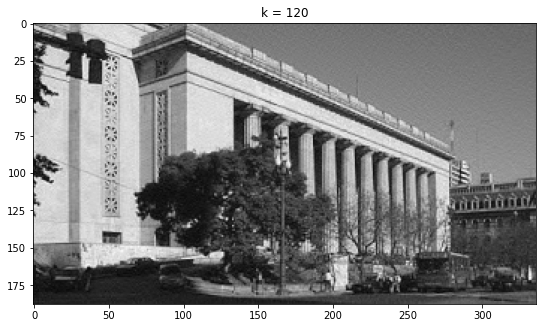

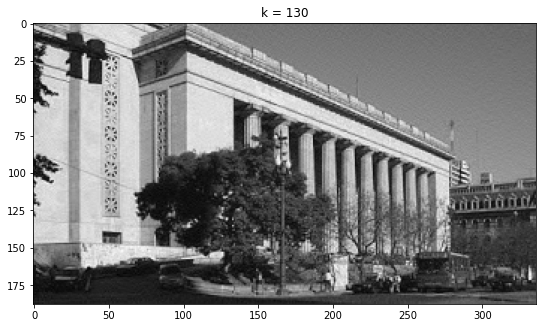

In [14]:
for i in range(0, 140, 10):
    reconstimg = np.matrix(u[:, :i]) * np.diag(s[:i]) * np.matrix(v[:i, :])
    plt.figure(figsize=(9,6))
    plt.imshow(reconstimg, cmap='gray')
    plt.title('k = ' + str(i))
    plt.show()